<a href="https://colab.research.google.com/github/namoshi/colab/blob/master/iris_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.datasets as dsets
import torchvision.transforms as transforms



In [8]:
data = load_iris()
X = data.data
Y = data.target
Name = data.target_names

print('X', X.shape)
# print('Y', Y)
# print('Name', Name)

# normalize the X 
ss = StandardScaler()

X = ss.fit_transform(X)
print(X)

train_dataset = X.astype(np.float32)
#train_dataset.dtype = 'float32'
print(train_dataset.shape)

# set data loader
train_loader = torch.utils.data.DataLoader(
      dataset=train_dataset,  # データセットの指定
      batch_size=10,  # ミニバッチの指定
      shuffle=True,  # シャッフルするかどうかの指定
      num_workers=2)  # コアの数

X (150, 4)
[[-9.00681170e-01  1.01900435e+00 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00 -1.31979479e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.38535265e+00  3.28414053e-01 -1.39706395e+00 -1.31544430e+00]
 [-1.50652052e+00  9.82172869e-02 -1.28338910e+00 -1.31544430e+00]
 [-1.02184904e+00  1.24920112e+00 -1.34022653e+00 -1.31544430e+00]
 [-5.37177559e-01  1.93979142e+00 -1.16971425e+00 -1.05217993e+00]
 [-1.50652052e+00  7.88807586e-01 -1.34022653e+00 -1.18381211e+00]
 [-1.02184904e+00  7.88807586e-01 -1.28338910e+00 -1.31544430e+00]
 [-1.74885626e+00 -3.62176246e-01 -1.34022653e+00 -1.31544430e+00]
 [-1.14301691e+00  9.82172869e-02 -1.28338910e+00 -1.44707648e+00]
 [-5.37177559e-01  1.47939788e+00 -1.28338910e+00 -1.31544430e+00]
 [-1.26418478e+00  7.88807586e-01 -1.22655167e+00 -1.31544430e+00]
 [-1.26418478e+00 -1.31979479e-01 -1.34022653e+00 -1.44707648e+00]
 [-1.87002413e+00 -1.31979479e-01 -1.51073881e+00 -1.44707648e+00]
 [-5.25060772e-02  2.16998818e+00 -1.45390138e+00 -

In [9]:
# Linear Multi Layer Perceptron Network
class MLP (nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(4, 2)   
        self.fc2 = nn.Linear(2, 4)
        
    def forward(self, x):
        y = self.fc1(x)
        z = self.fc2(y)
        return z
 

In [13]:
# select device
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MLP().to(device)

print(net)

# optimizing
criterion = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, weight_decay=0.001)


MLP(
  (fc1): Linear(in_features=4, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=4, bias=True)
)


In [11]:
###  training
print ('training start ...')
num_epochs = 50   
 
# initialize list for plot graph after training
train_loss_list = []

for epoch in range(num_epochs):
    # initialize each epoch
    train_loss = 0
    
    # ======== train_mode ======
    net.train()
    for i, xx in enumerate(train_loader):
#      print('i=',i)
#      print(xx)

      xx.to(device)
      optimizer.zero_grad()
      outputs = net(xx)
      loss = criterion(outputs, xx)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
      avg_train_loss = train_loss / len(train_loader.dataset)
    # print log
    print ('Epoch [{}/{}], Loss: {loss:.4f}' 
                   .format(epoch+1, num_epochs, i+1, loss=avg_train_loss))
    # append list for polt graph after training
    train_loss_list.append(avg_train_loss)


training start ...
Epoch [1/50], Loss: 0.0671
Epoch [2/50], Loss: 0.0555
Epoch [3/50], Loss: 0.0439
Epoch [4/50], Loss: 0.0342
Epoch [5/50], Loss: 0.0271
Epoch [6/50], Loss: 0.0220
Epoch [7/50], Loss: 0.0181
Epoch [8/50], Loss: 0.0153
Epoch [9/50], Loss: 0.0133
Epoch [10/50], Loss: 0.0117
Epoch [11/50], Loss: 0.0105
Epoch [12/50], Loss: 0.0095
Epoch [13/50], Loss: 0.0088
Epoch [14/50], Loss: 0.0081
Epoch [15/50], Loss: 0.0076
Epoch [16/50], Loss: 0.0072
Epoch [17/50], Loss: 0.0069
Epoch [18/50], Loss: 0.0066
Epoch [19/50], Loss: 0.0063
Epoch [20/50], Loss: 0.0061
Epoch [21/50], Loss: 0.0059
Epoch [22/50], Loss: 0.0058
Epoch [23/50], Loss: 0.0057
Epoch [24/50], Loss: 0.0056
Epoch [25/50], Loss: 0.0055
Epoch [26/50], Loss: 0.0054
Epoch [27/50], Loss: 0.0053
Epoch [28/50], Loss: 0.0053
Epoch [29/50], Loss: 0.0052
Epoch [30/50], Loss: 0.0052
Epoch [31/50], Loss: 0.0052
Epoch [32/50], Loss: 0.0051
Epoch [33/50], Loss: 0.0051
Epoch [34/50], Loss: 0.0051
Epoch [35/50], Loss: 0.0050
Epoch [36/

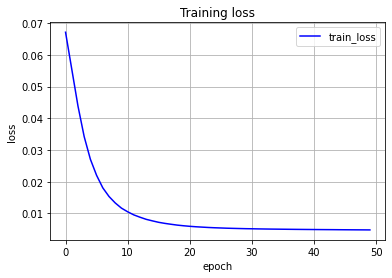

In [12]:
# plot graph
import matplotlib.pyplot as plt
 
plt.figure()
plt.plot(range(num_epochs), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training loss')
plt.grid()


No handles with labels found to put in legend.


[[-0.98979294 -0.29564178]
 [-0.6570834   0.13261312]
 [-0.8657042   0.00723547]
 [-0.79972416  0.07951444]
 [-1.0905752  -0.3635722 ]
 [-1.2374825  -0.72033346]
 [-1.0542207  -0.16822487]
 [-0.93086916 -0.21287954]
 [-0.70304555  0.27648872]
 [-0.70788646  0.05800056]
 [-1.0620141  -0.5052735 ]
 [-0.97272766 -0.19804773]
 [-0.66307527  0.16172934]
 [-0.8065311   0.2564667 ]
 [-1.214328   -0.76621777]
 [-1.5598471  -1.1402793 ]
 [-1.2657077  -0.6784004 ]
 [-1.0082586  -0.31210047]
 [-1.0693198  -0.6612593 ]
 [-1.2301768  -0.5643476 ]
 [-0.81892705 -0.28447613]
 [-1.1723175  -0.5002184 ]
 [-1.21663    -0.2710091 ]
 [-0.87137103 -0.21529168]
 [-0.9515588  -0.22949752]
 [-0.6185134   0.09898907]
 [-0.960744   -0.25628018]
 [-0.95827925 -0.31878257]
 [-0.88901067 -0.22771132]
 [-0.84453535 -0.0242143 ]
 [-0.7437531   0.04371619]
 [-0.8699707  -0.296427  ]
 [-1.3977628  -0.7858517 ]
 [-1.4262376  -0.91038775]
 [-0.726352    0.04154187]
 [-0.7993883  -0.02025381]
 [-0.89901966 -0.3357886 ]
 

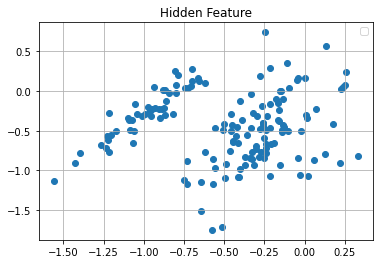

In [21]:
train_batch = torch.from_numpy(train_dataset).to(device)
result = net.fc1(train_batch).to('cpu').detach().numpy().copy()
print(result)

plt.figure()
plt.scatter(result[:,0], result[:,1])
plt.legend()
plt.title('Hidden Feature')
plt.grid()